In [32]:
import snsql
from snsql import Privacy
import sqlite3

privacy = Privacy(epsilon=0.1, delta=0.1) #standard: epsilon=1, delta=0.01
meta_path = 'medical.yaml'

conn = sqlite3.connect("medical.db")
reader = snsql.from_connection(conn, privacy=privacy, metadata=meta_path)
cur = conn.cursor()

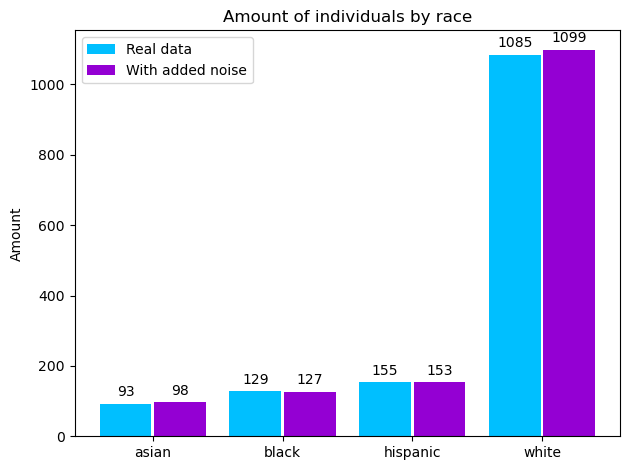

In [33]:
query = 'SELECT race, count(patient) AS amount FROM patients GROUP BY race'

cur.execute(query)
data = cur.fetchall()
noiseData = reader.execute(query)

labels, realCounts = map(list, zip(*data))
_, privateCounts = map(list, zip(*noiseData[1:]))

import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.01, realCounts, width, label='Real data', color='deepskyblue')
rects2 = ax.bar(x + width/2 + 0.01, privateCounts, width, label='With added noise', color='darkviolet')

ax.set_ylabel('Amount')
ax.set_title('Amount of individuals by race')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [21]:
reader.execute('SELECT description, count(patient) AS amount FROM conditions GROUP BY description ORDER BY amount')

[['description', 'amount'],
 ['Impacted molars', -48],
 ['Cardiac Arrest', -32],
 ['Rupture of patellar tendon', -22],
 ['Osteoporosis (disorder)', -18],
 ['Acute bacterial sinusitis (disorder)', -2],
 ['Primary fibromyalgia syndrome', 7],
 ['Fetus with chromosomal abnormality', 14],
 ['Diabetes', 18],
 ['Protracted diarrhea', 20],
 ['History of appendectomy', 21],
 ['Seizure disorder', 22],
 ['Chronic obstructive bronchitis (disorder)', 39],
 ['Normal pregnancy', 49],
 ['Pulmonary emphysema (disorder)', 52],
 ['Acute viral pharyngitis (disorder)', 56],
 ['Otitis media', 59],
 ['Prediabetes', 62],
 ['Hypertension', 72],
 ['Chronic sinusitis (disorder)', 85],
 ['Acute bronchitis (disorder)', 132],
 ['Viral sinusitis (disorder)', 201]]

In [4]:
query = """
    SELECT DISTINCT patients.patient, patients.race
    FROM patients
    JOIN conditions ON patients.patient = conditions.patient
    WHERE conditions.description = 'Diabetes'
    GROUP BY patients.patient
"""

cur.execute(query)
cur.fetchall()

[('0645f237-3878-4175-aab9-b60713d24342', 'white'),
 ('093c5b43-9b43-40a4-8cb6-ba2292cba7c0', 'black'),
 ('18a2d1c3-ec5d-4cdd-9a84-0311bc04adc5', 'white'),
 ('1a2305e5-686d-4fc1-9c25-691b63dadcab', 'white'),
 ('1e431355-d6ac-49a4-b275-bd7053d8ad23', 'white'),
 ('227e88cc-6ee1-44a8-a7e3-407d272df5e2', 'white'),
 ('27d3c718-96df-465f-b0de-227b958a3b67', 'asian'),
 ('29c6eb5a-27c0-49e5-8814-c71b153c5226', 'white'),
 ('29e6f83b-9c9c-4e83-8220-ac1a6de56086', 'black'),
 ('31069b16-3fdc-488f-90a2-ff72dcc380c9', 'hispanic'),
 ('31387087-3601-4bd9-92a1-4cc0bdc7fe58', 'hispanic'),
 ('32342351-2ce8-4fd3-a721-fbcd033cd3a9', 'hispanic'),
 ('336ed443-193d-49a6-9eb2-6fe60391b9f5', 'white'),
 ('34f917e5-3088-4b5a-bad4-38cfa12d83c6', 'white'),
 ('3763b69b-b5bf-4c0f-b24a-bee59c8a49f5', 'white'),
 ('376e3dce-3f04-4d92-91a3-c525423c3579', 'white'),
 ('3b01ceef-7fba-4c8a-89e3-d0ab6ffebe53', 'white'),
 ('3d392eab-9c13-4201-9f13-e1ca412f6dac', 'white'),
 ('428ab0b1-a2bd-4f08-863e-40f62b368c3f', 'white'),
 ('

In [17]:
query = """
    SELECT race, count(patient)
    FROM patients
    WHERE patient in
        (SELECT patient
        FROM conditions
        WHERE description = 'Diabetes')
    GROUP BY race
"""

cur.execute(query)
cur.fetchall()

[('asian', 10), ('black', 10), ('hispanic', 22), ('white', 55)]

In [16]:
query = """
    SELECT MIN(SUBSTRING(birthdate, 1, 4)), MAX(SUBSTRING(birthdate, 1, 4)), count(patient)
    FROM patients
    GROUP BY SUBSTRING(birthdate, 1, 3)
"""

cur.execute(query)
cur.fetchall()

[('1916', '1919', 46),
 ('1920', '1929', 156),
 ('1930', '1939', 154),
 ('1940', '1949', 120),
 ('1950', '1959', 143),
 ('1960', '1969', 164),
 ('1970', '1979', 130),
 ('1980', '1989', 136),
 ('1990', '1999', 142),
 ('2000', '2009', 155),
 ('2010', '2017', 116)]

In [14]:
query = """
SELECT o.patient, c.description AS condition, CAST(value AS DECIMAL) AS bmi
FROM observations o
JOIN conditions c ON o.encounter = c.encounter
WHERE o.description = 'Body Mass Index' AND c.description LIKE '%diabet%'
ORDER BY bmi
"""

cur.execute(query)
cur.fetchall()

[('7443d2b2-6444-4ae5-8ea5-1ed311c5433e', 'Prediabetes', 16.88),
 ('f759f9d7-97e6-486f-8fdd-ea20899c3abc', 'Prediabetes', 17.37),
 ('3959c1a0-fa86-4a48-b0ca-6990b812bf7d', 'Prediabetes', 17.94),
 ('b1a445be-94f5-46f4-8306-b4f016544f3c', 'Prediabetes', 20.22),
 ('d523e818-61aa-4b84-8ec3-e7f14ee28bfa', 'Prediabetes', 21.63),
 ('45c56ca6-d251-4616-82a4-45d2731ee5b1', 'Prediabetes', 22.38),
 ('4d6e126e-b583-47a3-8841-68aa5dec3923', 'Prediabetes', 22.38),
 ('eea6b44e-06a7-4d68-86a7-5567799eef18', 'Prediabetes', 22.65),
 ('7e4206bd-1d89-4744-8b82-21d31a1b25f0', 'Prediabetes', 22.74),
 ('b1745615-be46-4ceb-a70d-d78f49784568', 'Prediabetes', 22.78),
 ('2e1644ee-f7ca-4700-9b8a-ceb5bfb3efd2', 'Prediabetes', 22.91),
 ('c7972562-7f73-49e1-a70e-79ef22eeab42', 'Prediabetes', 22.95),
 ('5ad39139-628d-4239-ba89-e8a70628439f', 'Prediabetes', 23.29),
 ('86fc9c5b-ce25-4f37-850b-697fcd3256c1', 'Prediabetes', 23.57),
 ('1b364da6-6bdb-4c77-a5b2-26fe0b455621', 'Prediabetes', 23.57),
 ('0bcc9845-c873-492e-96e